# Language Models
### Authors: Rachid Riad, Julien Karadayi, Emmanuel Dupoux
#### Goals: 
- Small exercice and vizualizations with Weigthed Finite State Transducers
- Implementation: Edit Distance/Levenshtein with Finite State Transducers 
- Going Further with Composition of FSTs: Detect mispelled words/Generate candidate words 
- The basics of `Kaldi/Abkhazia` ASR tool, different language models, dictionnary

#### Dataset:
- Dictionary
- Librispeech

#### Softwares:
- Openfst/Pywrapfst
- Kaldi/Abkhazia


In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import os
import subprocess

import pywrapfst as fst

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


### I) Openfst / Pywrapfst
The OpenFst library is a C++ template library. It is a library for constructing, combining, optimizing, and searching weighted finite-state transducers (FSTs) The C++ code is used in many speech applications, and has been developped by NYU Courant Institute and Google Research. 

A link to the C++ api and the possible operations http://www.openfst.org/twiki/bin/view/FST/FstQuickTour#CreatingFsts

#### Exercice 1) Basic operations on Finite State Transducers (FSTs)

a) Build a finite state transducer that converts a sequence in Upercase to Lowercase with input vocubaluary $\Sigma = \{A,B\}$, and output vocabulary $\Omega = \{a,b\}$

b) Now, you want to to be able to handle, in addition to $\Sigma = \{A,B\}$, extra symbols in your input sequence such as $\{@,a,b,!,1,2,\_,-,\}$ how to modify the precedent transducer to do so?

c) Use the **Union** operation to answer the previous question.

d) You do not want to support anymore the numeric characters, $ \{1,2\}$, remove them with the **Difference** operation between two chosen FSTs.

e) Now, you want to go directly from $\Sigma = \{A,B\}$ to $\Delta = \{\alpha,\beta\}$, use the **Composition ** operation, a previous built FST a new one to have such a FST.

#### Solutions to exercise 1

a) First converter

In [2]:
# Buid symbol tables for input and output
input_table = fst.SymbolTable(name='input')
output_table = fst.SymbolTable(name='output')
input_symbs = ['<epsilon>','A','B']
output_symbs = ['<epsilon>','A','B','a','b']
print 'input_symbs:'
for idx,input_symb in enumerate(input_symbs):
    input_table.add_symbol(symbol=input_symb,key=idx)
    print idx, input_table.find(idx)

print 'output_symbs'
for idx,output_symb in enumerate(output_symbs):
    output_table.add_symbol(symbol=output_symb,key=idx)
    print idx, output_table.find(idx)

input_symbs:
0 <epsilon>
1 A
2 B
output_symbs
0 <epsilon>
1 A
2 B
3 a
4 b


We add A and B to the output table on purpose, to be able to do the difference of question d) because we need FSAs at this part. However we understand that the correct answer to question a) does not require to add A and B because $\Omega = \{a,b\}$.

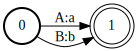

In [3]:
# Feed to a compiler the arcs, with accepted symbols
converter_compiler = fst.Compiler()
#print >> converter_compiler, "0 1 0 0"
print >> converter_compiler, "0 1 1 3"
print >> converter_compiler, "0 1 2 4"
## Final state
print >> converter_compiler, "1"
fst_data = converter_compiler.compile()
fst_data.set_input_symbols(input_table)
fst_data.set_output_symbols(output_table)
fst_data

b) Adding symbols

We can basically add symbols to the previous tranducer as we have done in the first cell of question a), using the union operator.

c) Union

In [4]:
# Buid symbol tables for input and output
input_table2 = fst.SymbolTable(name='input')
input_symbs2 = input_symbs+['a','b','@','!','1','2','_','−']
print 'input_symbs2:'
for idx,input_symb in enumerate(input_symbs2):
    input_table2.add_symbol(symbol=input_symb,key=idx)
    print idx, input_table2.find(idx)
output_table2 = fst.SymbolTable(name='output')
output_symbs2 = output_symbs+['@','!','1','2','_','−']
print 'output_symbs2:'
for idx,output_symb in enumerate(output_symbs2):
    output_table2.add_symbol(symbol=output_symb,key=idx)
    print idx, output_table2.find(idx)

input_symbs2:
0 <epsilon>
1 A
2 B
3 a
4 b
5 @
6 !
7 1
8 2
9 _
10 −
output_symbs2:
0 <epsilon>
1 A
2 B
3 a
4 b
5 @
6 !
7 1
8 2
9 _
10 −


We create two new tables for the new FSA resulting from the union.

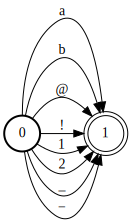

In [5]:
converter_compiler2 = fst.Compiler()
#print >> more_converter_compiler, "0 1 0 0"
print >> converter_compiler2, "0 1 3 3"
print >> converter_compiler2, "0 1 4 4"
print >> converter_compiler2, "0 1 5 5"
print >> converter_compiler2, "0 1 6 6"
print >> converter_compiler2, "0 1 7 7"
print >> converter_compiler2, "0 1 8 8"
print >> converter_compiler2, "0 1 9 9"
print >> converter_compiler2, "0 1 10 10"
## Final state
print >> converter_compiler2, "1"
fst_data2 = converter_compiler2.compile()

fst_data2.set_input_symbols(input_table2)
fst_data2.set_output_symbols(output_table2)
fst_data2

This FST is indeed a FSA, which is require to perform union.

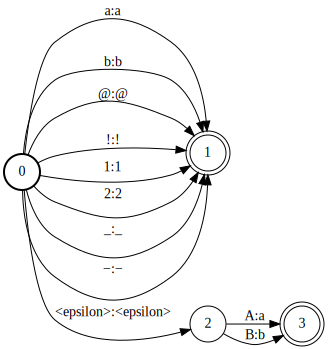

In [6]:
fst_data2.set_input_symbols(None); fst_data2.set_output_symbols(None)
fst_union_data = fst_data2.copy() 
fst_union_data.union(fst_data)
fst_union_data.set_input_symbols(input_table2)
fst_union_data.set_output_symbols(output_table2)

d) Difference

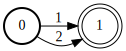

In [7]:
# Feed to a compiler the arcs, with accepted symbols
convertertosubstract_compiler = fst.Compiler()
#print >> convertertosubstract_compiler, "0 1 0 0"
print >> convertertosubstract_compiler, "0 1 7 7"
print >> convertertosubstract_compiler, "0 1 8 8"
## Final state
print >> convertertosubstract_compiler, "1"
fsttosubstract_data = convertertosubstract_compiler.compile()
fsttosubstract_data.set_input_symbols(input_table2)
fsttosubstract_data.set_output_symbols(output_table2)
fsttosubstract_data

In [8]:
#fsttosubstract_data=fst.arcmap(fsttosubstract_data,mt = 'output_epsilon')
#fsttosubstract_data

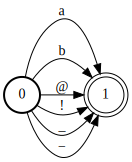

In [9]:
fsttosubstract_data = fst.determinize(fsttosubstract_data)
fstsubstract_data = fst.difference(fst_data2,fsttosubstract_data)
fstsubstract_data.set_input_symbols(input_table2)
fstsubstract_data.set_output_symbols(output_table2)

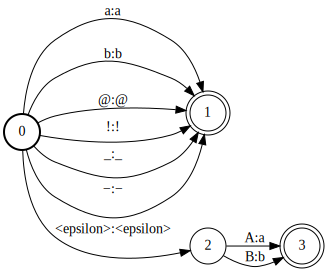

In [10]:
fstsubstract_data.set_input_symbols(None); fstsubstract_data.set_output_symbols(None)
fst_union_data = fstsubstract_data.copy() 
fst_union_data.union(fst_data)
fst_union_data.set_input_symbols(input_table2)
fst_union_data.set_output_symbols(output_table2)

e) Composition

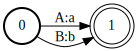

In [11]:
fst_data

In [12]:
# Buid symbol tables for input and output
input_table3 = fst.SymbolTable(name='input')
output_table3 = fst.SymbolTable(name='output')
input_symbs3 = ['<epsilon>','a','b']
output_symbs3 = ['<epsilon>','A','B','alpha','beta']
print 'input_symbs3:'
for idx,input_symb in enumerate(input_symbs3):
    input_table3.add_symbol(symbol=input_symb,key=idx)
    print idx, input_table3.find(idx)

print 'output_symbs3'
for idx,output_symb in enumerate(output_symbs3):
    output_table3.add_symbol(symbol=output_symb,key=idx)
    print idx, output_table3.find(idx)

input_symbs3:
0 <epsilon>
1 a
2 b
output_symbs3
0 <epsilon>
1 A
2 B
3 alpha
4 beta


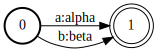

In [13]:
# Feed to a compiler the arcs, with accepted symbols
converter_compiler = fst.Compiler()
#print >> converter_compiler, "0 1 0 0"
print >> converter_compiler, "0 1 1 3"
print >> converter_compiler, "0 1 2 4"
## Final state
print >> converter_compiler, "1"
fst_data3 = converter_compiler.compile()
fst_data3.set_input_symbols(input_table3)
fst_data3.set_output_symbols(output_table3)
fst_data3

In [14]:
fst.compose(fst_data,fst_data3)

FstOpError: Operation failed

## END of TP2
We sincerely apologize for the lack of result on this TP but we have literally spent dozens of hours to try to understand what we have to do and check the documentation of pywrapfst and openfst. We have also sent you a mail but unfortunately you did not answer, it was maybe too late in the week.

Moreover, the VirtualBox require a pretty powerful computer and it was really hard to work properly on mine. I hope you will be comprehensive.

We had to stop here as our trials for exercise 2 and 3 were clearly not productive.

#### Exercice 2) Edit Distance and Weighted Finite State Transducers (WFSTs)

It is possible to compute the usual [Levenshtein distance or Edit Distance](https://en.wikipedia.org/wiki/Levenshtein_distance) with Weighted Finite State Transducers. 
In the cell below, it is an example of the operations to compute the Edit Distance with only additions taken into account for basic sequences from this Vocabulary $\Sigma = \{0,1\}$. You use the composition twice: $ S_1 \circ EditFST \circ S_2$. You obtain the Graph FST of all possible paths to go from one sequence to the other. Then you use the shortest path to obtain the Edit Distance.

a) In this part the vocabulary of the Language is $\Sigma = \{h,o,m,l,a,c, g\}$. Build a transducer for the **Edit Distance with the additions, substitutions and deletions**. You should use a small code snippet to not type everything by hands. Hint: Introduce some intermediate transitions type. Provide an explanation of the resulting weights and input/output transitions.

Any comments on the occupied memory for the WFST and $|\Sigma|$? Do you have a solution to reduce it? 
You are solving a **shortest-path problem in a graph with non-negative weights** to compute the finale edit distance. In the case of Edit Distance in linguistics, which algorithm should you use ? Justify your choice. 

b) Now, you are provided with a dictionnary of correct words. You want to detect the **misspelled words** in a text. The naive way without FST is to check whether or not each word of a text is present in the words vocabulary. Another way is: 0) Build a FST of your input text where each word is represented by a path 1) Compose your text FST with the dictionnary FST. You obtain only the intersection of the input words and dictonnary words. 2) Use the difference operation between the obtained FST and the input FST to obtain the mispelled words. Here is a FST with correct spelled words. Could you show some text inputs and use the previously described operation to detect misspelled ones.

Your vocabulary for this question is dict = {'coml','almanach'}, the text with mispells is T = 'cogml coml almanach lomh comll lamanach cocoml'. 

c) How can you use the Edit Distance WFST and the dictionnary to correct mispelled words?  

d) Bonus - **confusion matrix** : When you are typing on your Qwerty keyboard you are less likely to make the mistake $s \rightarrow p$ than $s \rightarrow d $.  When you use a recognizer of tri-phones, the algorithm is less likely to make non-valid phonotactically mistakes of never seen sequences. Imagine you are provided a confusion matrix with different penalties weights, how can you adapt your WFST in consequences?



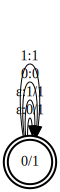

In [18]:
alphabet = ['&#949;', '0','1']
alphabet_table = fst.SymbolTable(name='Boolean')
for idx,element in enumerate(alphabet):
    alphabet_table.add_symbol(symbol=element,key=idx)

# Edit distance with FST: only additions
add_fst = fst.Fst()
add_fst.reserve_states(1)  # Optional.
s = add_fst.add_state()
add_fst.set_start(s)
add_fst.add_arc(s, fst.Arc(0, 1, 1.0, s))
add_fst.add_arc(s, fst.Arc(0, 2, 1.0, s))
add_fst.add_arc(s, fst.Arc(1, 1, 0.0, s))
add_fst.add_arc(s, fst.Arc(2, 2, 0.0, s))
add_fst.set_final(s, 1)
add_fst.set_input_symbols(alphabet_table)
add_fst.set_output_symbols(alphabet_table)
add_fst

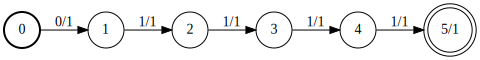

In [19]:
# Two sequences 011 and 01111 represented by FSTs
# 011
sequence1 = fst.Fst()
sequence1.reserve_states(3)
s = sequence1.add_state()
sequence1.set_start(s)
n = sequence1.add_state()
sequence1.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = sequence1.add_state()
sequence1.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence1.add_state()
sequence1.add_arc(s, fst.Arc(2, 2, 1.0, n))
sequence1.set_final(n, 1)
sequence1.set_input_symbols(alphabet_table)
sequence1.set_output_symbols(alphabet_table)

# 01111
sequence2 = fst.Fst()
sequence2.reserve_states(5)
s = sequence2.add_state()
sequence2.set_start(s)
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
sequence2.set_final(n, 1)
sequence2.set_input_symbols(alphabet_table)
sequence2.set_output_symbols(alphabet_table)

# help(fst.Weight)

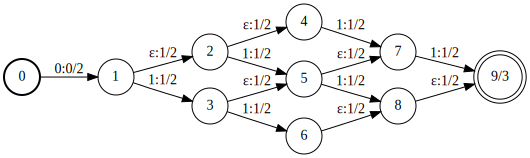

In [20]:
full_model = fst.compose(fst.compose(sequence1,add_fst),sequence2)
full_model

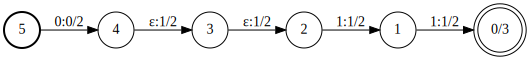

In [74]:
fst.shortestpath(full_model)

### II) Kaldi / Abkhazia

The goal of this part is to train different language models, and understand the influence of the parameters. This exercice is more open and we wait explanations and interpretations of the results.

Kaldi is a C++ library developed by John Hopkins University, and is used by several of the main assistants, Siri of Apple, Alexa of Amazon.
Abkhazia is a python library around Kaldi for an easier use.

#### Exercice 3 Language models and N-grams
One acoustic model has been pre-trained, at word level. You can see the paramaters of the acoustic model with the command `help(abkhazia.acoustic)`.  

Below, you will find commands to 1) Load the corpus 2) Train a simple lanugage model 3) Decode a corpus with it
You can find the models here : `/home/vagrant/models`
You can have access to all parameters for the language model with `help(abkhazia.language)` 
You can find find the results per utterance here : `decode/scoring_kaldi/wer_details/per_utt`

a) Can you explain the parameters based on the lecture class?

b) Can you try different the different pre-trained acoustic models?

c) What are the more important parameters for the model, what are the advantages and drawbacks of different modelizations? Complexity, Sparsity, Time computations, etc...

d) Can you vizualize some parts of the grammar `G.fst` for one of your experiment and explain in terms of Weigthed Finite State Transducers the parameters.

e) Bonus: What is `L.fst`? 

f) Can you make a quick summary of the whole pipeline to have an ASR system?

In [75]:
import abkhazia
import abkhazia.acoustic
import abkhazia.language
# help(abkhazia.language)

In [76]:
import abkhazia.utils as utils
import abkhazia.commands.abstract_command 
import abkhazia.corpus 

In [77]:
corpus_dir = "/home/vagrant/models/corpus_francais/data"
output_dir_lm = "/home/vagrant/models/exp1_example/language_model"
log = abkhazia.utils.logger.get_log(
    os.path.join(output_dir_lm, 'language.log'), verbose=True)

## Load corpus in abkhazia format
corpus = abkhazia.corpus.Corpus.load(corpus_dir, validate=True, log=log)

## Instanciate the lm recipe and compute the LM
recipe = abkhazia.language.LanguageModel(
    corpus, output_dir_lm, log=log,
    order=2, level='phone',
    position_dependent_phones=False,
    silence_probability=0.5)
recipe.delete_recipe = False
recipe.compute()



KeyboardInterrupt: 

In [ ]:
## Decode step
# paths
corpus = "/home/vagrant/models/corpus_francais"
features = "/home/vagrant/models/features"
acoustic = "/home/vagrant/models/am_trisa_word"
output_dir_decode = "/home/vagrant/models/exp1_example/decode"
# corpus is different from corpus_dir as the line commands adss automaticaly '/data/'

# command
cmd = ["abkhazia", "decode", "sa", corpus,
       "-o", output_dir_decode, "-l", output_dir_lm,
       "-f", features, "-a", acoustic, "--recipe",
       "--verbose",'--force']
print ' '.join(cmd)
process = subprocess.Popen(cmd, shell=False)
process.wait()